Sebelum lanjut, untuk pengguna google colab harap lakukan save a copy in drive dulu ya. Di latihan ini kita akan bahas contoh kasus :     

1. Uji beda 2 kelompok berhubungan
2. Uji beda 2 kelompok independent
3. Uji beda lebih dari 2 kelompok

keduanya akan dilakukan secara parametrik dan nonparametrik




In [4]:
#Import all library needed

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

# Uji beda 2 kelompok berhubungan

Diketahui nilai mahasiswa saat belajar offline dan online sebagai berikut (dalam skala 10)

offline = [10, 9, 7, 8, 7, 8, 9, 9, 8, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 8, 9]

online = [8, 8, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 7, 8, 7, 8, 7, 8, 7, 8]

In [5]:
#Data
offline = np.array([10, 9, 7, 8, 7, 8, 9, 9, 8, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 8, 9])
online = np.array([8, 8, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 7, 8, 7, 8, 7, 8, 7, 8])

## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


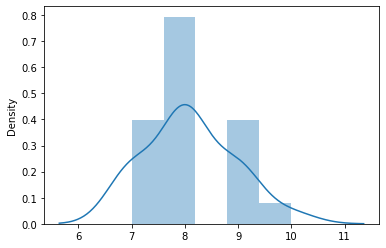

In [6]:
#Dengan histogram
sns.distplot(offline)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


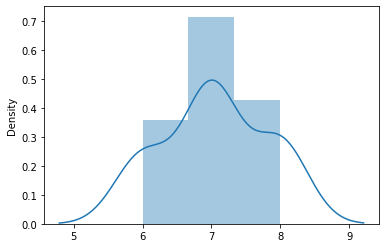

In [7]:
#Dengan histogram
sns.distplot(online)

Berdasarkan histogram, data berbentuk seperti lonceng dengan rata-rata pas di tengah, sehingga bisa kita simpulkan data berdistribusi normal berdasarkan histogram, mari coba dengan uji kolmogorov smirnov

In [8]:
#Uji Kolmogorov-Smirnov
z_score_offline = stats.zscore(offline)
z_score_online = stats.zscore(online)
print('uji kolmogorov smirnov data offline = ', stats.kstest(z_score_offline, "norm"))
print('uji kolmogorov smirnov data online = ', stats.kstest(z_score_online, "norm"))

uji kolmogorov smirnov data offline =  KstestResult(statistic=0.26103162250727835, pvalue=0.09451762212928216)
uji kolmogorov smirnov data online =  KstestResult(statistic=0.2405721397434657, pvalue=0.14871291095568448)


Karena kedua nilai p-value > 0.05, maka Ho diterima, data berdistribusi normal

## Paired Sample T-Test (Parametrik)

Ho = Tidak ada perbedaan yang signifikan (keduanya sama)

Ha = ada perbedaan yang signifikan (artinya metode pembelajaran offline/online mempengaruhi nilai siswa)

In [ ]:
t_value = stats.ttest_rel(offline, online)
print('hasil uji t: ', t_value)

hasil uji t:  Ttest_relResult(statistic=7.175608803587865, pvalue=5.99463858437324e-07)


karena p-value = 5.9 x 10^(-7) < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan dari nilai mahasiswa, metode pembelajaran offline/online berpengaruh signifikan terhadap nilai siswa

## Uji Wilcoxon (nonparametrik)

Misalkan datanya tidak berdistribusi normal, uji beda 2 kelompok berhubungan dapat dilakukan dengan uji wilcoxon. Caranya

In [ ]:
d = offline - online
stats.wilcoxon(d)

WilcoxonResult(statistic=0.0, pvalue=7.897245521335617e-05)

karena p-value = 7.897 x 10^(-5) < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan dari nilai mahasiswa, metode pembelajaran offline/online berpengaruh signifikan terhadap nilai siswa

# Uji Beda 2 kelompok independent

Misalkan seorang CEO kafe ingin mengetahui apakah ada perbedaan yang signifikan antara jumlah pengunjung kafe di wilayah A dan B selama 2 minggu terakhir

A = [27, 29, 27, 32, 34, 38, 39, 27, 30, 32, 34, 36, 38, 40]

B = [29, 30, 29, 27, 30, 40, 39, 28, 30, 26, 27, 28, 39, 39]

In [9]:
A = np.array([27, 29, 27, 32, 34, 38, 39, 27, 30, 32, 34, 36, 38, 40])
B = np.array([28, 30, 29, 35, 34, 37, 39, 28, 30, 32, 33, 35, 39, 39])

## Latihan 1
Coba lihat lagi cara uji normalitas di atas, coba lakukan pada data A dan B

## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


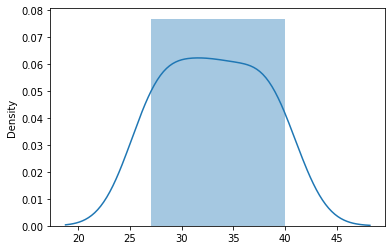

In [10]:
#Cek Normalitas A Dengan histogram
sns.distplot(A)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


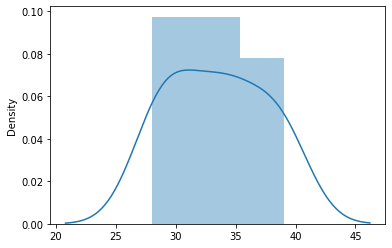

In [11]:
#Cek Normalitas B Dengan histogram
sns.distplot(B)

In [14]:
#Uji Kolmogorov-Smirnov
z_score_A = stats.zscore(A)
z_score_B = stats.zscore(B)
print('uji kolmogorov smirnov data A = ', stats.kstest(z_score_A, "norm"))
print('uji kolmogorov smirnov data B = ', stats.kstest(z_score_B, "norm"))

uji kolmogorov smirnov data A =  KstestResult(statistic=0.15010032999139777, pvalue=0.9106696943287013)
uji kolmogorov smirnov data B =  KstestResult(statistic=0.16609147661220497, pvalue=0.8346609194732189)


Apakah keduanya berdistribusi normal? bagaimana kamu mengetahuinya?

Data berdistribusi normal karena seperti lonceng yaitu ditengah

## Independent Sample T-Test (Parametrik)
Ho = Tidak ada perbedaan yang signifikan (keduanya sama)

Ha = ada perbedaan yang signifikan (artinya lokasi kafe berpengaruh signifikan terhadap jumlah pengunjung)

In [ ]:
t_value = stats.ttest_ind(A, B)
print('hasil uji t: ', t_value)

hasil uji t:  Ttest_indResult(statistic=-0.21626215417063352, pvalue=0.8304712072353047)


Nilai p-value = 0.83 > 0.05, artinya Ho diterima, tidak terdapat perbedaan yang signifikan antara jumlah pengunjung kafe wilayah A dan B, berarti lokasi kafe tidak berpengaruh signifikan terhadap jumlah pengunjung

## Uji Mann-Whitney
Misalkan datanya tidak berdistribusi normal, uji beda 2 kelompok independent dapat dilakukan dengan uji Mann-whitney. Caranya

In [12]:
stats.mannwhitneyu(A, B)

MannwhitneyuResult(statistic=91.0, pvalue=0.38212917802691737)

## Latihan 2
Tulis kesimpulanmu disini apakah Ho diterima atau ditolak dan apa artinya

Ho diterima karena pada data tersebut tidak terdapat perbedaan yang signifikan karena pada data A 0.15 lebih besar dari 0.91 dan pada data B 0.16 lebih besar dari 0.83

# Uji Beda lebih dari 2 kelompok

Dalam statistik parametrik, nama metodenya adalah ANOVA. ANOVA memiliki 2 asumsi :    
1. Data Berdistribusi Normal
2. Varians data homongen

**Kasus**

Misalkan saat ini kamu adalah menteri pendidikan yang ingin mengetahui apakah kualitas pendidikan di negara ini sudah merata atau belum. Daerah dibagi menjadi kota besar di wilayah berat, kota kecil di barat, ibukota, kota besar di wilayah timur, dan kota kecil di timur. Analisa ini dilakukan berdasarkan nilai ujian akhir SMA

In [19]:
final_exam = pd.read_csv('final_exam.csv')
final_exam

FileNotFoundError: ignored

## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

In [22]:
#Membuat histogram dari pandas dan matplotlib

final_exam.hist()
plt.show()

NameError: ignored

Terlihat beberapa datanya seperti tidak normal, mari kita coba uji Kolmogorov-Smirnov untuk mengeceknya

In [16]:
#Check normality using Kolmogorov-Smirnov Test
area = ['big_west', 'small_west', 'capital_city', 'small_east', 'big_east']
for a in area:
  z_score = stats.zscore(final_exam[a])
  normality = stats.kstest(z_score, 'norm', )
  print('normality for ', a, '=', normality)

NameError: ignored

## Latihan 3
Coba simpulkan apakah artinya data berdistribusi normal?

Data berdistribusi normal karena data berada di tengah diagram

## Uji Homogenitas

Ho = varians semua kelompok cenderung sama (homogen)

Ha = varians semua kelompok cenderung tidak sama (homogen)

In [ ]:
#Uji Homogenitas dengan Levene
stats.levene(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

LeveneResult(statistic=0.5104303607286808, pvalue=0.728125042716542)

Karena p-value > 0.05, maka Ho diterima sehingga asumsi homogenitas dari ANOVA sudah terpenuhi

## Uji ANOVA (parametrik)

Ho = kualitas pendidikan merata (tidak ada perbedaan kualitas pendidikan yang signifikan antar wilayah)

Ha = kualitas pendidikan tidak merata (ada perbedaan kualitas pendidikan yang signifikan antar wilayah)

In [ ]:
stats.f_oneway(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

F_onewayResult(statistic=18.48895253915249, pvalue=4.945434101915241e-13)

Karena p-value < 0.05, maka Ho ditolak, ternyata kualitas pendidikan di negara ini belum merata. Untuk itu, kamu perlu menyelidiki wilayah dengan rata-rata terendah agar kualitas sarana pendidikan dan gurunya bisa ditingkatkan

In [21]:
final_exam.describe()

NameError: ignored

Ternyata nilai rata-rata di ibukota jauh diatas wilayah lain, sementara kota kecil di timur mendapat nilai rata-rata terkecil. Sebagai menteri pendidikan berarti kamu harus membuat program untuk membangun sarana pendidikan yang lebih baik dan mengirim guru-guru terbaik ke kota kecil di wilayah timur.

## Uji Kruskal-Wallis (nonparametrik)
Jika datanya ternyata tidak berdistribusi normal atau tidak homogen, kamu bisa menggunakan uji Kruskal Wallis sebagai berikut

In [ ]:
stats.kruskal(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city']
             , final_exam['small_east'], final_exam['big_east'])

KruskalResult(statistic=57.244594069662135, pvalue=1.0992920086269013e-11)

## Latihan 4

Coba bikin kesimpulan dari hasil p-value tersebut

Data hasil p value menunjukkan bahwa data sudah akurat dan benar 

# Latihan tambahan

Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanggan. Jadi kamu ingin memebandingkan nilai "bintang" dari customer saat dia order di jam macet dan tidak macet.
(#hint = data dari customer yang sama)

macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]

tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

1. Buat hipotesisnya
2. Lakukan uji asumsi normalitasnya
3. Jika datanya normal lakukan uji parametrik, jika tidak berdistribusi normal lakukan uji nonparametrik
4. Apa kesimpulan uji hipotesisnya?

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

1. Hipotesis

macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]

tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

In [25]:
macet = np.array([2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5])
tidak_macet = np.array([2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4])

2. Uji Normalitas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


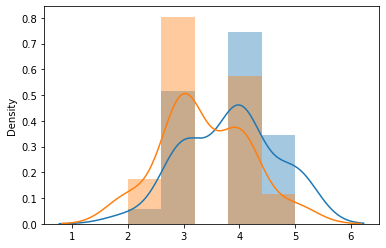

In [26]:
sns.distplot(macet)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


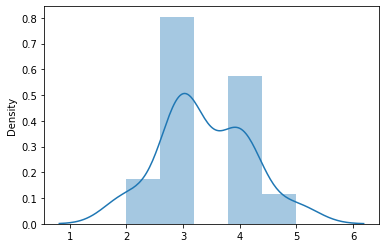

In [27]:
sns.distplot(tidak_macet)

3. Uji Parametik dan Uji Non Parametik

In [28]:
t_value = stats.ttest_rel(macet, tidak_macet)
print('hasil uji t: ', t_value)

hasil uji t:  Ttest_relResult(statistic=4.217756949399827, pvalue=0.00023376335151900594)


In [29]:
d = macet - tidak_macet
stats.wilcoxon(d)

WilcoxonResult(statistic=8.0, pvalue=0.0007891129890156299)

4. Kesimpulan


data A berdistrusi tidak normal dikarenakan diagram yang tidak ditengah dan berisisan dengan diagram lainnya